<a href="https://colab.research.google.com/github/IMI1998/Dog_Breed_Prediction/blob/main/Dog_Breed_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"imifrj","key":"11f2750409013f4e2e50fd88c0b2e738"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir dog_dataset
%cd dog_dataset

/content/dog_dataset


In [ ]:
!kaggle datasets list -s dogbreedidfromcomp

ref                                title                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------  ----------------------  -----  -------------------  -------------  ---------  ---------------  
catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp  691MB  2020-06-26 03:09:05           5332          8  0.1764706        


In [ ]:
!kaggle datasets download catherinehorng/dogbreedidfromcomp
%cd ..

 99% 683M/691M [00:08<00:00, 94.9MB/s]
100% 691M/691M [00:08<00:00, 81.7MB/s]
/content


In [ ]:
!unzip dog_dataset/dogbreedidfromcomp.zip -d dog_dataset
!rm dog_dataset/dogbreedidfromcomp.zip
!rm dog_dataset/sample_submission.csv

Streaming output truncated to the last 5000 lines.
  inflating: dog_dataset/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog_dataset/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog_dataset/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog_dataset/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog_dataset/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog_dataset/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog_dataset/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog_dataset/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog_dataset/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog_dataset/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog_dataset/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog_dataset/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog_dataset/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: dog_dataset/train/840db91b

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten , Conv2D , MaxPool2D
from keras.optimizers import Adam

In [ ]:
data = pd.read_csv("dog_dataset/labels.csv")
data.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
breeds = data.value_counts(data['breed'])
breeds.head()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
dtype: int64

In [ ]:
CLASS_NAMES = ['scottish_deerhound' , 'maltese_dog' , 'bernese_mountain_dog']
data = data[(data['breed'].isin(CLASS_NAMES))]
data = data.reset_index()
data.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [ ]:
X_data = np.zeros((len(data) , 224 ,224 ,3) , dtype="float32")
Y_data = label_binarize(data['breed'] , classes= CLASS_NAMES )

for i in tqdm(range(len(data))):
  img = image.load_img('dog_dataset/train/%s.jpg' % data['id'][i] , target_size=(224,224))
  img = image.img_to_array(img)
  x = np.expand_dims(img.copy() , axis=0)
  X_data[i] = x/255.0


100%|██████████| 357/357 [00:00<00:00, 409.15it/s]


In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 16)        0

In [ ]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [ ]:
history = model.fit(X_train, Y_train, batch_size = 128, epochs = 100, validation_data = (X_val, Y_val))

Epoch 1/100
2/2 [==============================] - 50s 25s/step - loss: 4.8910 - accuracy: 0.3828 - val_loss: 4.8690 - val_accuracy: 0.4462
Epoch 2/100
2/2 [==============================] - 49s 23s/step - loss: 4.8650 - accuracy: 0.4062 - val_loss: 4.8440 - val_accuracy: 0.4923
Epoch 3/100
2/2 [==============================] - 43s 24s/step - loss: 4.8395 - accuracy: 0.4102 - val_loss: 4.8188 - val_accuracy: 0.4615
Epoch 4/100
2/2 [==============================] - 43s 24s/step - loss: 4.8139 - accuracy: 0.4062 - val_loss: 4.7935 - val_accuracy: 0.3692
Epoch 5/100
2/2 [==============================] - 39s 21s/step - loss: 4.7882 - accuracy: 0.3984 - val_loss: 4.7682 - val_accuracy: 0.3692
Epoch 6/100
2/2 [==============================] - 43s 21s/step - loss: 4.7626 - accuracy: 0.3828 - val_loss: 4.7429 - val_accuracy: 0.3692
Epoch 7/100
2/2 [==============================] - 42s 24s/step - loss: 4.7368 - accuracy: 0.3789 - val_loss: 4.7177 - val_accuracy: 0.3846
Epoch 8/100
2/2 [===

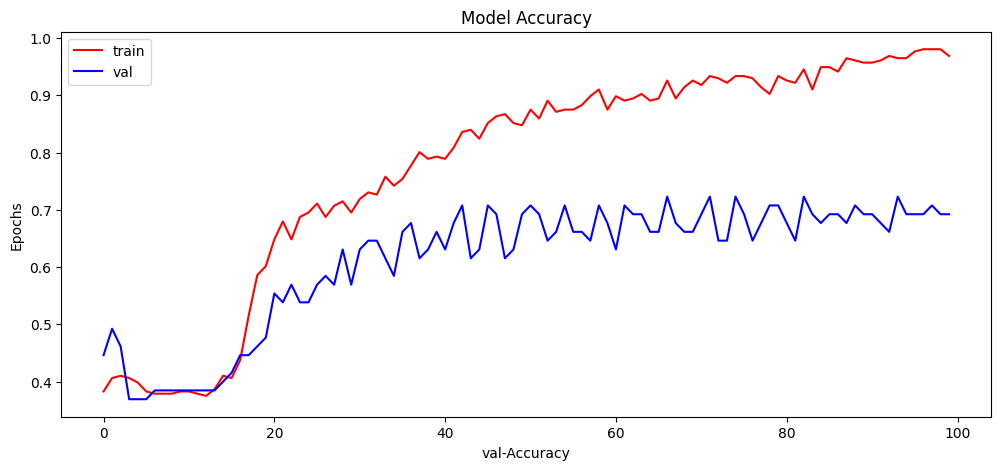

In [ ]:
plt.figure(figsize = (12 ,5 ))
plt.plot(history.history['accuracy'] , color='r')
plt.plot(history.history['val_accuracy'] , color='b')
plt.title('Model Accuracy')
plt.xlabel('val-Accuracy')
plt.ylabel('Epochs')
plt.legend(['train' , 'val'])

plt.show()



In [ ]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test , Y_test)
score = round((score[1]*100),2)
score

2/2 [==============================] - 2s 250ms/step - loss: 3.2458 - accuracy: 0.7222


72.22

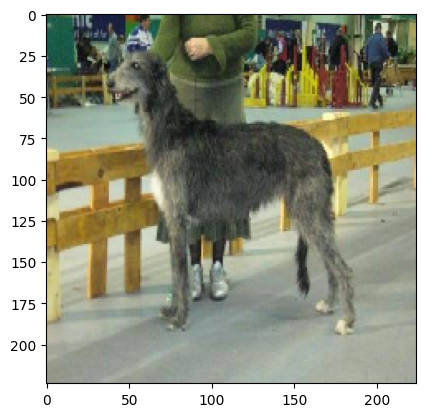

orginally :  scottish_deerhound
Predicted :  scottish_deerhound


In [ ]:
plt.imshow(X_test[1,:,:,:])
plt.show()

print('orginally : ' , data['breed'][np.argmax(Y_test[1])])
print('Predicted : ' , data['breed'][np.argmax(Y_pred[1])])